In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import recall_score,precision_score, f1_score, roc_auc_score, confusion_matrix ,make_scorer
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False  # MINUS SIGN 사용 비활성화
mpl.rcParams['font.family'] = 'NanumGothic'  # 또는 다른 폰트


In [2]:
df = pd.read_csv('../파생변수데이터셋/상장_파생_ir.csv')
columns = ['매출액대비영업현금흐름', '순운전자본비율', '운전자본회전률', '자본분배율', '영업이익대비이자보상배율',
        '총부채대비영업현금흐름', '매출액순이익률', '자본금순이익률', '부채비율', '순이익증가율', 
        '시장자기자본순이익률', '자기자본순이익률', 'EBITDA(백만원)']

In [3]:
df[df['y']==1]

,Unnamed: 0,회사명,거래소코드,회계년도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,유동자산증가율,유형자산증가율,...,영업이익대비이자보상배율_산업평균차,총부채대비영업현금흐름_산업평균차,매출액순이익률_산업평균차,자본금순이익률_산업평균차,부채비율_산업평균차,순이익증가율_산업평균차,시장자기자본순이익률_산업평균차,자기자본순이익률_산업평균차,EBITDA(백만원)_산업평균차,산업위험
133,133,울트라건설(주),4320,2014-12-01,-48.045405,-2750.187665,-202.895290,-62.505291,-58.537214,-2.133112,...,-45.288125,-0.000169,-58.362500,-375.981875,-114.241250,-2554.628037,-742.697141,2.891250,-46988.050000,1
162,162,(주)렉스엘이앤지,4790,2013-12-01,-57.019962,76.067550,-1068.124911,-63.398395,-64.793925,-38.914783,...,-18.110414,-0.280389,-137.237517,-154.446207,-128.585379,2354.246884,-47.533481,3.678966,-16197.804690,1
382,382,(주)행남사,8800,2013-12-01,3.961626,7.157920,5.262326,-4.852233,8.002937,-6.439193,...,-2.089167,-0.245195,0.490833,-51.515000,-64.616667,-104.095075,-1.975586,-1.938333,-13424.490833,0
553,553,쌍용건설(주),12650,2013-12-01,-31.216636,-47.155565,327.254316,-3.851554,-31.188819,-15.991222,...,-4.944000,-0.223563,-34.342000,-485.270000,-122.922000,72.511883,-45.028394,5.324000,-152414.862000,1
611,611,(주)에이제이에스,13340,2013-12-01,-48.770909,-23143.841736,-99.846860,-20.775577,-60.186643,-18.100164,...,-43.605357,-0.119010,-136.832857,-304.886429,62969.984643,-22646.295178,-170.776551,-204.244286,-52072.032500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,10842,(주)오션스톤,329020,2021-12-01,-13.418479,-513.704201,-218.225188,78.573041,72.136401,-1.273448,...,-22.452222,0.025108,-103.854167,-1047.375139,-93.590417,-584.868916,-179.552654,4.601528,-8693.489306,1
10930,10930,(주)켈스,402420,2022-12-01,8.015871,-66.627502,-181.626856,85.652884,-10.268344,34.233834,...,-11.646364,-0.307317,35.205909,-136.323485,-95.626667,-238.893673,0.006094,4.315758,-16298.299545,0
10932,10932,차이나그레이트스타인터내셔널리미티드,900040,2018-12-01,2.101596,295.152821,6.240733,-10.847706,4.998715,-12.111950,...,13.240714,0.828426,-4.436429,-168.315000,-66.155000,126.055752,27.045595,-3.482857,-169775.654286,0
10933,10933,에스앤씨엔진그룹리미티드,900080,2019-12-01,-0.733638,-68.280181,1.080114,-15.378461,-10.223245,35.494932,...,0.902667,1.240577,-3.543333,-311.686667,-73.458667,-45.154403,2.535810,-6.344667,-172325.433333,0


In [4]:
# 성능확인 코드
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, fbeta_score
import numpy as np

import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    f2 = fbeta_score(y_test, pred, beta=2)
    # G-mean 계산
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    gmean = np.sqrt(tpr * tnr)

    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}, f2 :{4:.4f}'.format(accuracy, precision, recall, f1, f2))
    print('ROC 스코어: {0:.4f}, PR 스코어 : {1:.4f}, G-mean : {2:.4f}'.format(roc_score, pr_score, gmean))

# 임계값에 따른 오차행렬및 스코어 -------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        # ROC 커브 계산
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba_c1)
        roc_auc = auc(fpr, tpr)
        print("임곗값:", custom_threshold)
        print("ROC_AUC:", roc_auc)
        get_clf_eval(y_test, custom_predict)
        print("---------------------------------------------------------")

from sklearn.metrics import roc_curve, auc
def roc(model,name) :
    # 테스트 데이터에 대한 예측 확률 계산
    pred = model.predict_proba(X_test)[:, 1]

    # ROC 커브 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 커브에 AUC 면적에 색을 입히는 코드 수정
    plt.figure(figsize=(10, 6))

    # ROC 커브 시각화 및 AUC 면적 색칠
    plt.fill_between(fpr, tpr, color='palegoldenrod', alpha=0.4, label=f'Area under curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='peru', lw=2)

    # 기본 설정
    plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}')
    plt.legend(loc="lower right")
    return plt.show()

In [5]:
# 클래스 레이블 y가 1인 경우에 대한 처리
for i in columns:
    # 무한대 값 제외하고 최대값, 최소값 계산
    max_value = df.loc[(df['y'] == 1) & (np.isfinite(df[i])), i].max()
    min_value = df.loc[(df['y'] == 1) & (np.isfinite(df[i])), i].min()

    # 무한대 값을 최대값 또는 최소값으로 대체
    df.loc[(df['y'] == 1) & (df[i] == np.inf), i] = max_value
    df.loc[(df['y'] == 1) & (df[i] == -np.inf), i] = min_value

# 클래스 레이블 y가 0인 경우에 대한 처리
for i in columns:
    # 무한대 값 제외하고 최대값, 최소값 계산
    max_value = df.loc[(df['y'] == 0) & (np.isfinite(df[i])), i].max()
    min_value = df.loc[(df['y'] == 0) & (np.isfinite(df[i])), i].min()

    # 무한대 값을 최대값 또는 최소값으로 대체
    df.loc[(df['y'] == 0) & (df[i] == np.inf), i] = max_value
    df.loc[(df['y'] == 0) & (df[i] == -np.inf), i] = min_value

In [6]:
train = df[df['회계년도'] <= '2020-11-01']
test = df[df['회계년도'] >= '2020-11-01']

In [7]:
train, test

(       Unnamed: 0              회사명   거래소코드        회계년도     총자본증가율  \
 0               0         삼천당제약(주)     250  2013-12-01  27.277086   
 1               1         삼천당제약(주)     250  2014-12-01  11.013223   
 2               2         삼천당제약(주)     250  2015-12-01   6.823177   
 3               3         삼천당제약(주)     250  2016-12-01  11.317289   
 4               4         삼천당제약(주)     250  2017-12-01  14.640655   
 ...           ...              ...     ...         ...        ...   
 10949       10949  (주)엑세스바이오인코퍼레이션  950130  2018-12-01   1.567602   
 10950       10950  (주)엑세스바이오인코퍼레이션  950130  2019-12-01 -26.475771   
 10954       10954         잉글우드랩(주)  950140  2017-12-01   9.453746   
 10955       10955         잉글우드랩(주)  950140  2018-12-01  13.333296   
 10956       10956         잉글우드랩(주)  950140  2019-12-01  10.088970   
 
             순이익증가율    자기자본증가율     매출액증가율    유동자산증가율     유형자산증가율  ...  \
 0       466.163338  37.626249  36.389843  53.365759   -0.053908  ...   
 1       127

In [8]:
len(train[train['y']==0]['y']), len(train[train['y']==1]['y'])

(6933, 108)

In [9]:
len(test[test['y']==0]['y']), len(test[test['y']==1]['y'])

(3865, 59)

In [10]:
from scipy.stats.mstats import winsorize


# 데이터프레임의 각 열에 대해 winsorize를 적용
for col in columns:
    # y == 1인 경우
    train.loc[train['y'] == 1, col] = winsorize(train.loc[train['y'] == 1, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 1, col] = winsorize(test.loc[test['y'] == 1, col], limits=[0.01, 0.01])

    # y == 0인 경우
    train.loc[train['y'] == 0, col] = winsorize(train.loc[train['y'] == 0, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 0, col] = winsorize(test.loc[test['y'] == 0, col], limits=[0.01, 0.01])

# 결과 확인
train[columns].describe()


,매출액대비영업현금흐름,순운전자본비율,운전자본회전률,자본분배율,영업이익대비이자보상배율,총부채대비영업현금흐름,매출액순이익률,자본금순이익률,부채비율,순이익증가율,시장자기자본순이익률,자기자본순이익률,EBITDA(백만원)
count,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000
mean,0.020146,21.228510,0.159408,18.078919,7.569127,0.182112,-7.652356,53.134159,103.565864,-48.768822,-0.405764,-2.859669,10061.772743
std,0.292953,26.355928,0.464733,83.672375,35.048997,0.444284,52.982592,204.667030,188.606888,480.333509,22.898419,33.109562,19778.471898
min,-7.465138,-167.210000,0.000000,-704.840000,-51.020000,-1.235212,-1241.820000,-1889.630000,0.000000,-8800.279334,-792.761266,-977.270000,-162560.080000
25%,-0.013188,2.760000,0.000000,9.120000,0.000000,-0.023520,-3.950000,-29.120000,29.550000,-68.521221,-3.326085,-5.870000,1039.690000
50%,0.054692,21.840000,0.010000,36.060000,0.000000,0.116149,2.470000,27.910000,65.400000,-0.362301,2.873772,3.950000,4600.860000
75%,0.125666,39.790000,0.130000,52.240000,3.890000,0.321118,7.910000,115.670000,129.520000,72.408551,7.867752,10.160000,12223.730000
max,0.565360,77.940000,8.990000,83.450000,264.990000,1.999578,38.250000,913.750000,7670.250000,1449.177839,39.476447,40.000000,117216.450000


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 스케일러 초기화
scaler = StandardScaler()
scale_columns = ['매출액대비영업현금흐름', '순운전자본비율', '운전자본회전률', '자본분배율', '영업이익대비이자보상배율', '총부채대비영업현금흐름', '매출액순이익률', '자본금순이익률', '부채비율', '순이익증가율', '시장자기자본순이익률', '자기자본순이익률', 'EBITDA(백만원)']

# 훈련 데이터에 대해 스케일러 학습 및 변환
train.loc[:,scale_columns] = scaler.fit_transform(train[scale_columns])

# 테스트 데이터 변환 (훈련 데이터로부터 학습된 파라미터 사용)
test.loc[:,scale_columns] = scaler.transform(test[scale_columns])

In [12]:
# X_y 분류
y_train = train['y']
X_train = train[columns]

y_test = test['y']
X_test = test[columns]

In [13]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours

# smote = BorderlineSMOTE(k_neighbors=7, m_neighbors=7,sampling_strategy=0.25, random_state=17)
smote = ADASYN(n_neighbors=5,sampling_strategy=0.3, random_state=17)
# under = EditedNearestNeighbours(n_neighbors=5)
# SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# X_test, y_test = under.fit_resample(X_test,y_test)
# Checking the shape of the original and resampled data
original_shape = train.shape
resampled_shape = X_resampled.shape

original_shape, resampled_shape

((7041, 69), (9035, 13))

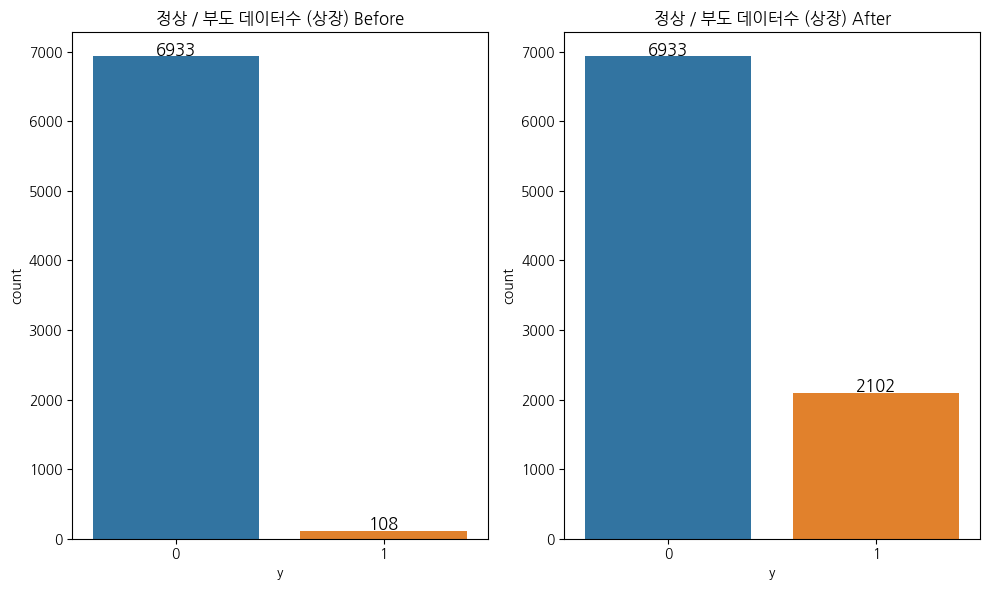

<Figure size 640x480 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 두 데이터셋을 시각화합니다.
plt.figure(figsize=(10, 6))
# 첫 번째 데이터셋
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="y", data=train[['y']], ax=ax1)
plt.title("정상 / 부도 데이터수 (상장) Before")

# 각 막대 위에 숫자 표시
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
# 두 번째 데이터셋 (시리즈)
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, ax=ax2)
plt.title("정상 / 부도 데이터수 (상장) After")

# 각 막대 위에 숫자 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show() 
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=17, penalty='l2', C=1)
lr.fit(X_resampled, y_resampled)
lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)

get_clf_eval(y_test, lr_pred)
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[3584  281]
 [  23   36]]
정확도: 0.9225, 정밀도 : 0.1136, 재현율:0.6102,F1 스코어:0.1915, f2 :0.3255
ROC 스코어: 0.7687, PR 스코어 : 0.0752, G-mean : 0.7522
임곗값: 0.1
ROC_AUC: 0.8754533295327471
오차행렬
[[2511 1354]
 [   5   54]]
정확도: 0.6537, 정밀도 : 0.0384, 재현율:0.9153,F1 스코어:0.0736, f2 :0.1642
ROC 스코어: 0.7825, PR 스코어 : 0.0364, G-mean : 0.7711
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.8754533295327471
오차행렬
[[2888  977]
 [   8   51]]
정확도: 0.7490, 정밀도 : 0.0496, 재현율:0.8644,F1 스코어:0.0938, f2 :0.2017
ROC 스코어: 0.8058, PR 스코어 : 0.0449, G-mean : 0.8037
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.8754533295327471
오차행렬
[[3115  750]
 [  12   47]]
정확도: 0.8058, 정밀도 : 0.0590, 재현율:0.7966,F1 스코어:0.1098, f2 :0.2275
ROC 스코어: 0.8013, PR 스코어 : 0.0500, G-mean : 0.8013
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.8754533295327471
오차행렬
[[3246  619]
 [  13   46]]
정확도: 0.8389, 정밀도 : 0.0692, 재현율:0.7797,F1 스코어:0.1271, f2 :0.2

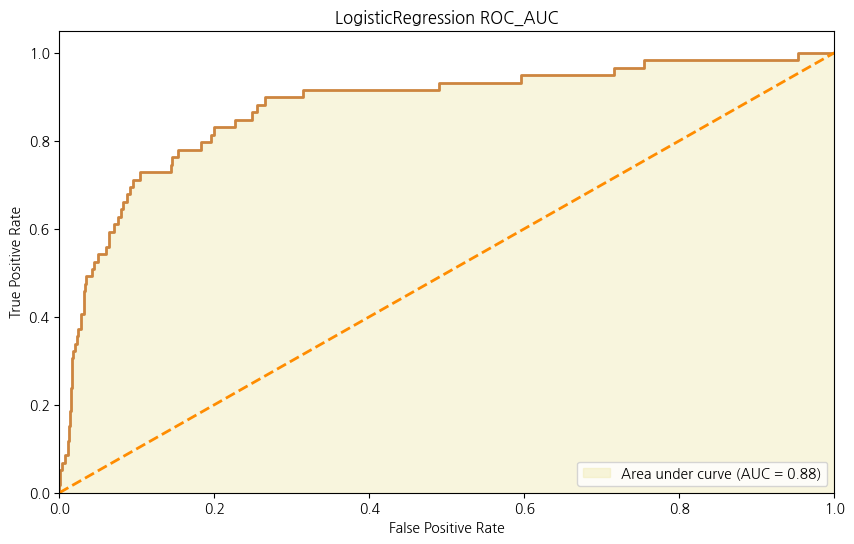

In [35]:
roc(lr, 'LogisticRegression ROC_AUC')

In [36]:
# 모델의 계수 추출
coefficients = lr.coef_[0]

# 피쳐 이름과 계수를 DataFrame으로 생성
feature_importance = pd.DataFrame({'Feature': X_resampled.columns, 'Coefficient': coefficients})

# 계수의 절대값을 기준으로 피쳐 중요도 정렬
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=True)

# 결과 출력
print(feature_importance)

         Feature  Coefficient  Absolute_Coefficient
9         순이익증가율     0.031436              0.031436
2        운전자본회전률     0.034592              0.034592
6        매출액순이익률    -0.047018              0.047018
3          자본분배율     0.069200              0.069200
4   영업이익대비이자보상배율     0.117386              0.117386
7        자본금순이익률     0.143059              0.143059
11      자기자본순이익률    -0.147082              0.147082
0    매출액대비영업현금흐름    -0.148361              0.148361
8           부채비율    -0.215803              0.215803
5    총부채대비영업현금흐름    -0.428913              0.428913
1        순운전자본비율    -0.620004              0.620004
10    시장자기자본순이익률    -0.920687              0.920687
12   EBITDA(백만원)    -1.726846              1.726846


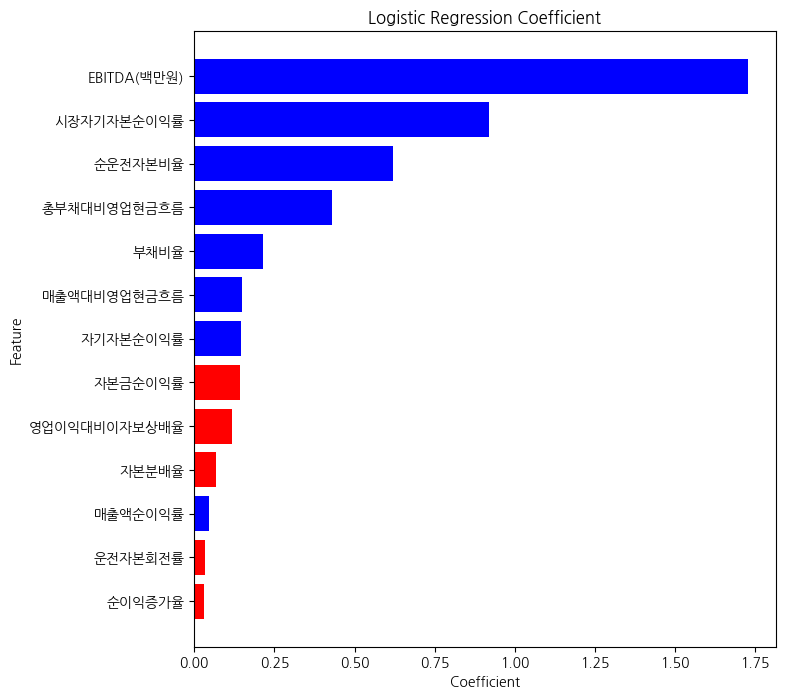

In [37]:
# 상위 10개 중요 피쳐만 선택
top_features = feature_importance.tail(15)

# Calculate absolute values of coefficients
top_features['Absolute_Coefficient'] = top_features['Coefficient'].abs()

# Sorting features based on absolute values of coefficients
top_features = top_features.sort_values(by='Absolute_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(7.5, 8))
bars = plt.barh(top_features['Feature'], top_features['Absolute_Coefficient'], 
                color=np.where(top_features['Coefficient'] < 0, 'blue', 'red'))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficient')

# Show plot
plt.show()

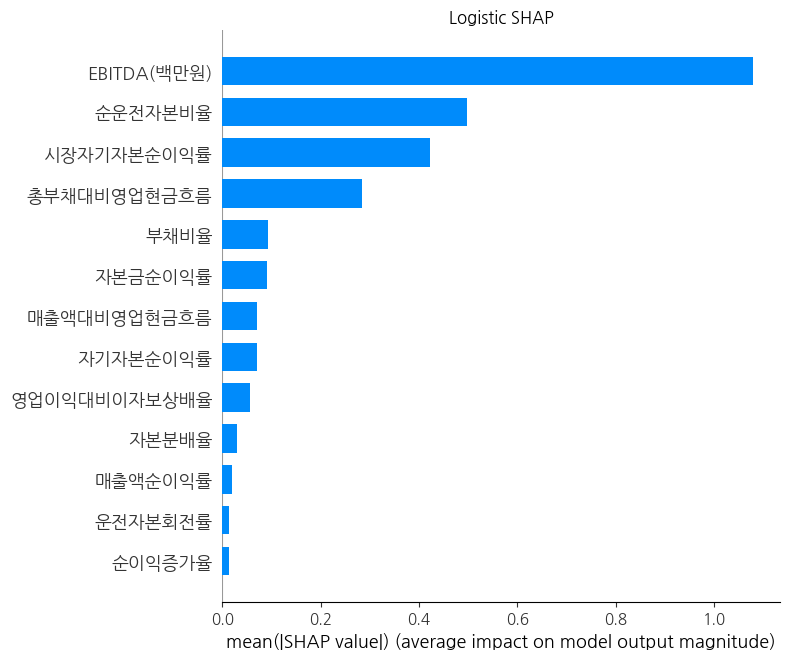

In [38]:
shap.initjs()
lr_explainer = shap.LinearExplainer(lr, X_train)
lr_shap_values = lr_explainer.shap_values(X_train)
plt.title('Logistic SHAP')
shap.summary_plot(lr_shap_values, X_train, plot_type='bar')

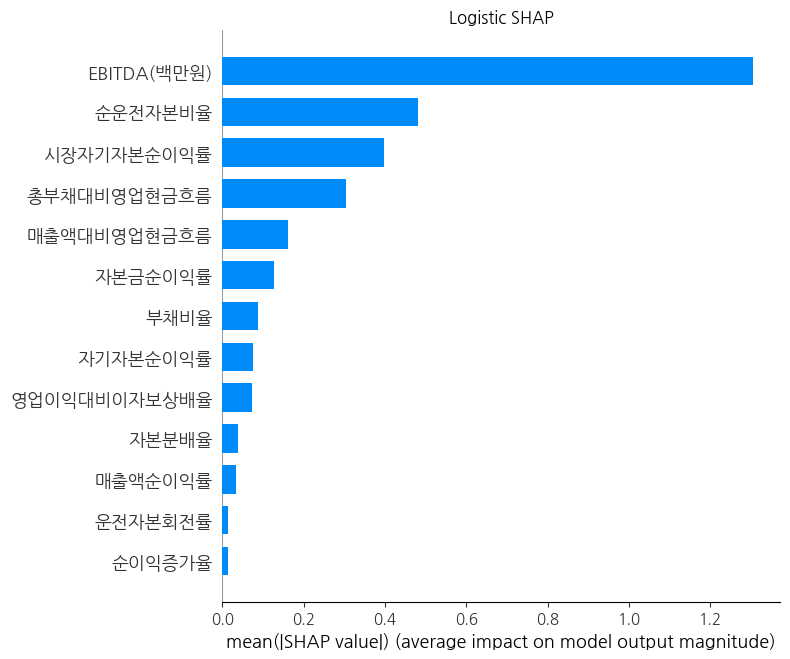

In [39]:
shap.initjs()
lr_explainer = shap.Explainer(lr, X_train)
lr_shap_values = lr_explainer.shap_values(X_test)
plt.title('Logistic SHAP')
shap.summary_plot(lr_shap_values, X_test, plot_type='bar')

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=17, 
                            max_depth=3, 
                            )
dt.fit(X_resampled, y_resampled)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

get_clf_eval(y_test, dt_pred)
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[3440  425]
 [  25   34]]
정확도: 0.8853, 정밀도 : 0.0741, 재현율:0.5763,F1 스코어:0.1313, f2 :0.2446
ROC 스코어: 0.7332, PR 스코어 : 0.0491, G-mean : 0.7162
임곗값: 0.1
ROC_AUC: 0.8166005218497161
오차행렬
[[2788 1077]
 [   9   50]]
정확도: 0.7232, 정밀도 : 0.0444, 재현율:0.8475,F1 스코어:0.0843, f2 :0.1834
ROC 스코어: 0.7844, PR 스코어 : 0.0399, G-mean : 0.7819
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.8166005218497161
오차행렬
[[2788 1077]
 [   9   50]]
정확도: 0.7232, 정밀도 : 0.0444, 재현율:0.8475,F1 스코어:0.0843, f2 :0.1834
ROC 스코어: 0.7844, PR 스코어 : 0.0399, G-mean : 0.7819
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.8166005218497161
오차행렬
[[3080  785]
 [  18   41]]
정확도: 0.7954, 정밀도 : 0.0496, 재현율:0.6949,F1 스코어:0.0927, f2 :0.1930
ROC 스코어: 0.7459, PR 스코어 : 0.0391, G-mean : 0.7442
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.8166005218497161
오차행렬
[[3440  425]
 [  25   34]]
정확도: 0.8853, 정밀도 : 0.0741, 재현율:0.5763,F1 스코어:0.1313, f2 :0.2

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


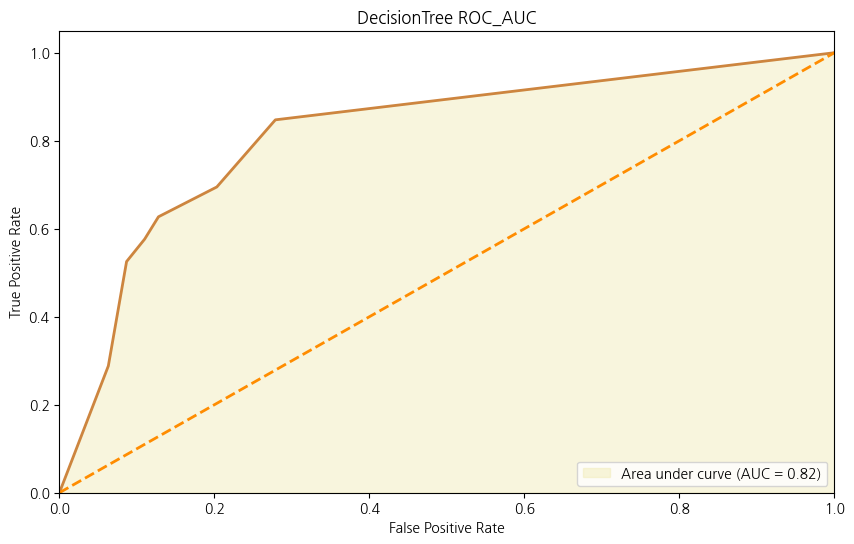

In [41]:
roc(dt, 'DecisionTree ROC_AUC')

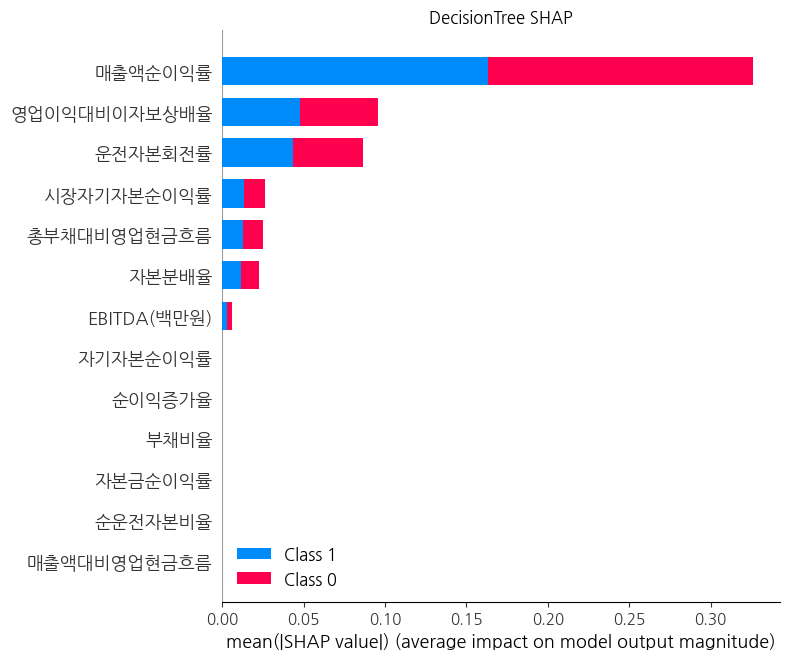

In [42]:
shap.initjs()
dt_explainer = shap.TreeExplainer(dt)
dt_shap_values = dt_explainer.shap_values(X_train)
plt.title('DecisionTree SHAP')
shap.summary_plot(dt_shap_values, X_train, plot_type='bar')

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=17, 
                            n_estimators=100, 
                            max_depth=4, 
                            min_samples_split=2,
                            min_samples_leaf=1)
rf.fit(X_resampled, y_resampled)
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

get_clf_eval(y_test, rf_pred)
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[3655  210]
 [  24   35]]
정확도: 0.9404, 정밀도 : 0.1429, 재현율:0.5932,F1 스코어:0.2303, f2 :0.3638
ROC 스코어: 0.7694, PR 스코어 : 0.0909, G-mean : 0.7490
임곗값: 0.1
ROC_AUC: 0.9082640822680729
오차행렬
[[2450 1415]
 [   3   56]]
정확도: 0.6386, 정밀도 : 0.0381, 재현율:0.9492,F1 스코어:0.0732, f2 :0.1640
ROC 스코어: 0.7915, PR 스코어 : 0.0369, G-mean : 0.7757
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.9082640822680729
오차행렬
[[2673 1192]
 [   4   55]]
정확도: 0.6952, 정밀도 : 0.0441, 재현율:0.9322,F1 스코어:0.0842, f2 :0.1854
ROC 스코어: 0.8119, PR 스코어 : 0.0421, G-mean : 0.8029
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.9082640822680729
오차행렬
[[2848 1017]
 [   6   53]]
정확도: 0.7393, 정밀도 : 0.0495, 재현율:0.8983,F1 스코어:0.0939, f2 :0.2029
ROC 스코어: 0.8176, PR 스코어 : 0.0460, G-mean : 0.8136
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.9082640822680729
오차행렬
[[3023  842]
 [   6   53]]
정확도: 0.7839, 정밀도 : 0.0592, 재현율:0.8983,F1 스코어:0.1111, f2 :0.2

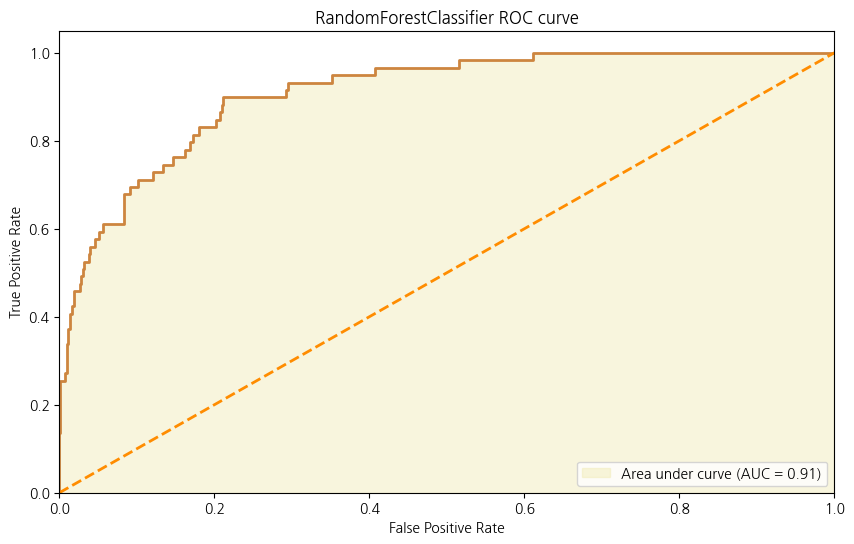

In [44]:
roc(rf, 'RandomForestClassifier ROC curve')

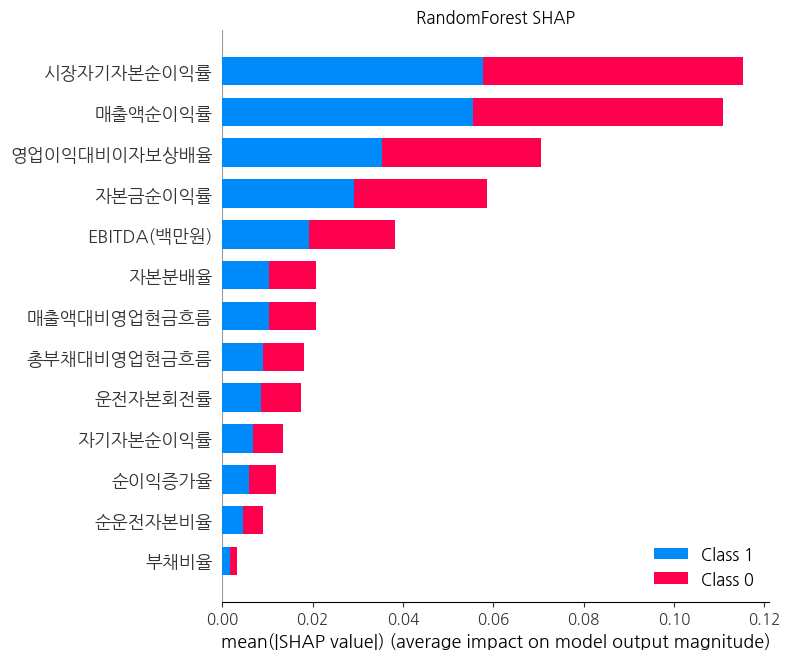

In [45]:
shap.initjs()
rf_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_explainer.shap_values(X_train)
plt.title('RandomForest SHAP')
shap.summary_plot(rf_shap_values, X_train, plot_type='bar')

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=17,
                    n_estimators=90,
                    max_depth=5,
                    learning_rate=0.03,
                    reg_lambda=2,
                    reg_alpha=0.02,
                    min_split_loss=2
                    )
xgb.fit(X_resampled, y_resampled)
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

get_clf_eval(y_test, xgb_pred)
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[3727  138]
 [  30   29]]
정확도: 0.9572, 정밀도 : 0.1737, 재현율:0.4915,F1 스코어:0.2566, f2 :0.3598
ROC 스코어: 0.7279, PR 스코어 : 0.0930, G-mean : 0.6885
임곗값: 0.1
ROC_AUC: 0.9071567961058611
오차행렬
[[2830 1035]
 [   6   53]]
정확도: 0.7347, 정밀도 : 0.0487, 재현율:0.8983,F1 스코어:0.0924, f2 :0.2002
ROC 스코어: 0.8153, PR 스코어 : 0.0453, G-mean : 0.8110
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.9071567961058611
오차행렬
[[3101  764]
 [  10   49]]
정확도: 0.8028, 정밀도 : 0.0603, 재현율:0.8305,F1 스코어:0.1124, f2 :0.2336
ROC 스코어: 0.8164, PR 스코어 : 0.0526, G-mean : 0.8163
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.9071567961058611
오차행렬
[[3285  580]
 [  14   45]]
정확도: 0.8486, 정밀도 : 0.0720, 재현율:0.7627,F1 스코어:0.1316, f2 :0.2613
ROC 스코어: 0.8063, PR 스코어 : 0.0585, G-mean : 0.8051
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.9071567961058611
오차행렬
[[3414  451]
 [  17   42]]
정확도: 0.8807, 정밀도 : 0.0852, 재현율:0.7119,F1 스코어:0.1522, f2 :0.2

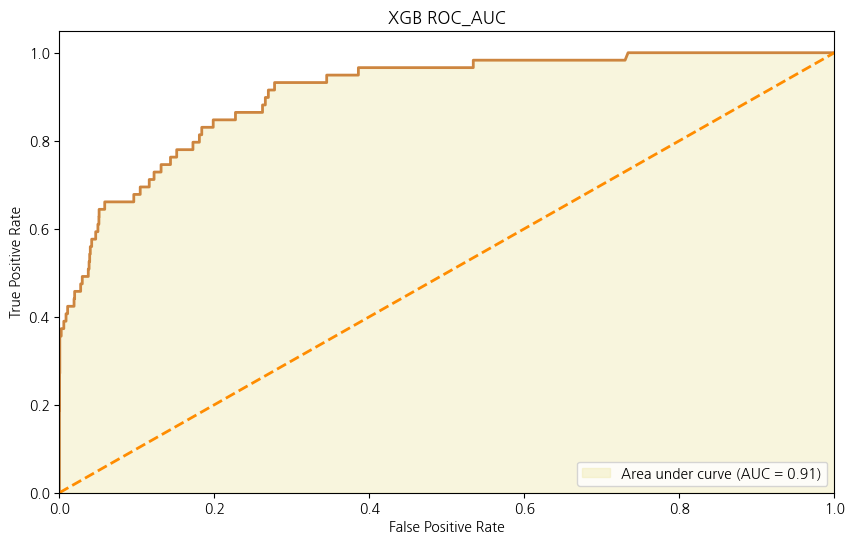

In [47]:
roc(xgb, 'XGB ROC_AUC')

[13:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


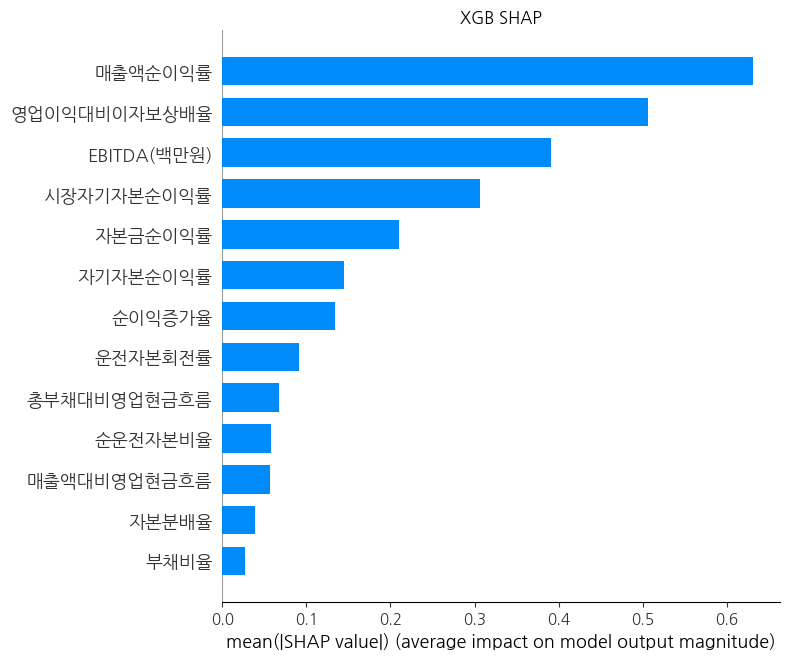

In [48]:
shap.initjs()
xgb_explainer = shap.TreeExplainer(xgb)
xgb_shap_values = xgb_explainer.shap_values(X_train)
plt.title('XGB SHAP')
shap.summary_plot(xgb_shap_values, X_train, plot_type='bar')

In [49]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=17,
                    n_estimators=70, #트리의 최대 개수 (n_estimators): 100
                    learning_rate=0.005,  #학습률 (learning_rate): 0.1
                    num_leaves=31,  #리프 노드의 최대 개수 (num_leaves): 31
                    max_depth=5,
                    bagging_fraction=0.5, 
                    feature_fraction=0.5, 
                    lambda_l1=0.1, 
                    lambda_l2=0.1,#트리의 최대 깊이 (max_depth): -1 (제한 없음)
                    verbose_eval = -1
                    )
lgb.fit(X_resampled, y_resampled)
lgb_pred = lgb.predict(X_test)
lgb_pred_proba = lgb.predict_proba(X_test)

get_clf_eval(y_test, lgb_pred)
get_eval_by_threshold(y_test , lgb_pred_proba[:,1].reshape(-1,1), thresholds)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


오차행렬
[[   0 3865]
 [   0   59]]
정확도: 0.0150, 정밀도 : 0.0150, 재현율:1.0000,F1 스코어:0.0296, f2 :0.0709
ROC 스코어: 0.5000, PR 스코어 : 0.0150, G-mean : 0.0000
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.9068322845177276
오차행렬
[[   0 3865]
 [   0   59]]
정확도: 0.0150, 정밀도 : 0.0150, 재현율:1.0000,F1 스코어:0.0296, f2 :0.0709
ROC 스코어: 0.5000, PR 스코어 : 0.0150, G-mean : 0.0000
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.9068322845177276
오차행렬
[[2725 1140]
 [   4   55]]
정확도: 0.7085, 정밀도 : 0.0460, 재현율:0.9322,F1 스코어:0.0877, f2 :0.1922
ROC 스코어: 0.8186, PR 스코어 : 0.0439, G-mean : 0.8107
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.9068322845177276
오차행렬
[[3350  515]
 [  16   43]]
정확도: 0.8647, 정밀도 : 0.0771, 재현율:0.7288,F1 스코어:0.1394, f2 :0.2708
ROC 스코어: 0.7978, PR 스코어 : 0.0602, G-mean : 0.7948
---------------------------------------------------------
임곗값: 0.3
ROC_AUC: 0.9068322845177276
오차행렬
[[3644  221]
 [  26   33]]
정확

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


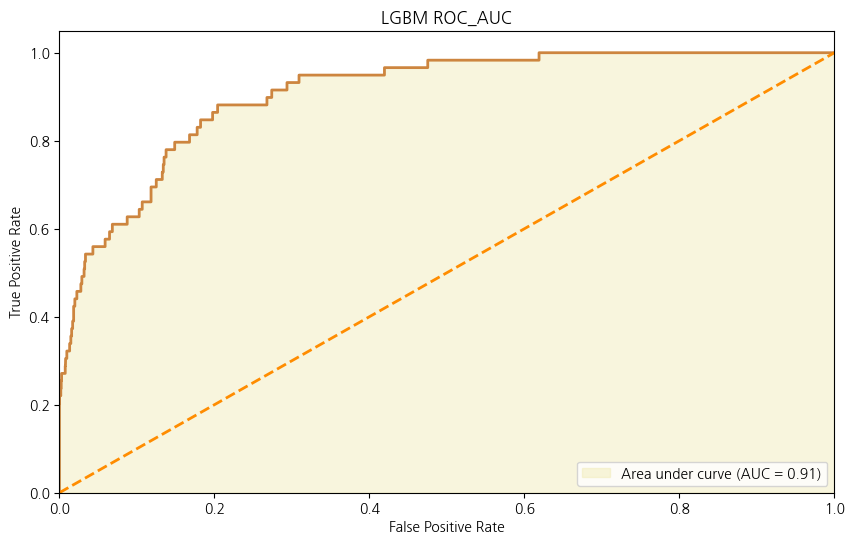

In [50]:
roc(lgb, 'LGBM ROC_AUC')

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


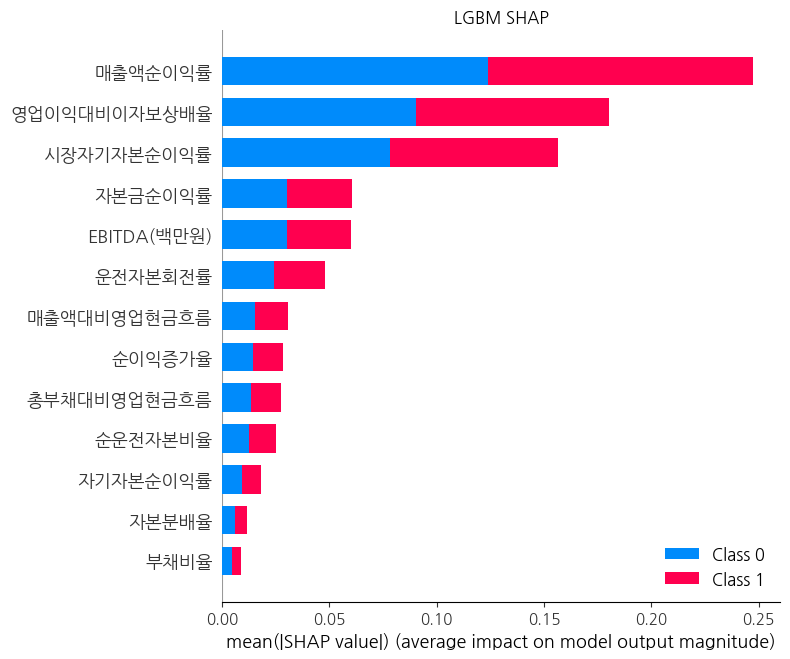

In [51]:
shap.initjs()
lgb_explainer = shap.TreeExplainer(lgb)
lgb_shap_values = lgb_explainer.shap_values(X_train)
plt.title('LGBM SHAP')
shap.summary_plot(lgb_shap_values, X_train, plot_type='bar')

In [52]:
from sklearn.svm import SVC
svc = SVC(random_state=17,probability=True, kernel='rbf')
svc.fit(X_resampled, y_resampled)
svc_pred = svc.predict(X_test)
svc_pred_proba = svc.predict_proba(X_test)

get_clf_eval(y_test, svc_pred)
get_eval_by_threshold(y_test , svc_pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[3666  199]
 [  31   28]]
정확도: 0.9414, 정밀도 : 0.1233, 재현율:0.4746,F1 스코어:0.1958, f2 :0.3024
ROC 스코어: 0.7115, PR 스코어 : 0.0664, G-mean : 0.6709
임곗값: 0.1
ROC_AUC: 0.821759817571864
오차행렬
[[3075  790]
 [  16   43]]
정확도: 0.7946, 정밀도 : 0.0516, 재현율:0.7288,F1 스코어:0.0964, f2 :0.2011
ROC 스코어: 0.7622, PR 스코어 : 0.0417, G-mean : 0.7615
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.821759817571864
오차행렬
[[3262  603]
 [  19   40]]
정확도: 0.8415, 정밀도 : 0.0622, 재현율:0.6780,F1 스코어:0.1140, f2 :0.2275
ROC 스코어: 0.7610, PR 스코어 : 0.0470, G-mean : 0.7564
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.821759817571864
오차행렬
[[3355  510]
 [  21   38]]
정확도: 0.8647, 정밀도 : 0.0693, 재현율:0.6441,F1 스코어:0.1252, f2 :0.2423
ROC 스코어: 0.7561, PR 스코어 : 0.0500, G-mean : 0.7477
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.821759817571864
오차행렬
[[3412  453]
 [  23   36]]
정확도: 0.8787, 정밀도 : 0.0736, 재현율:0.6102,F1 스코어:0.1314, f2 :0.2483


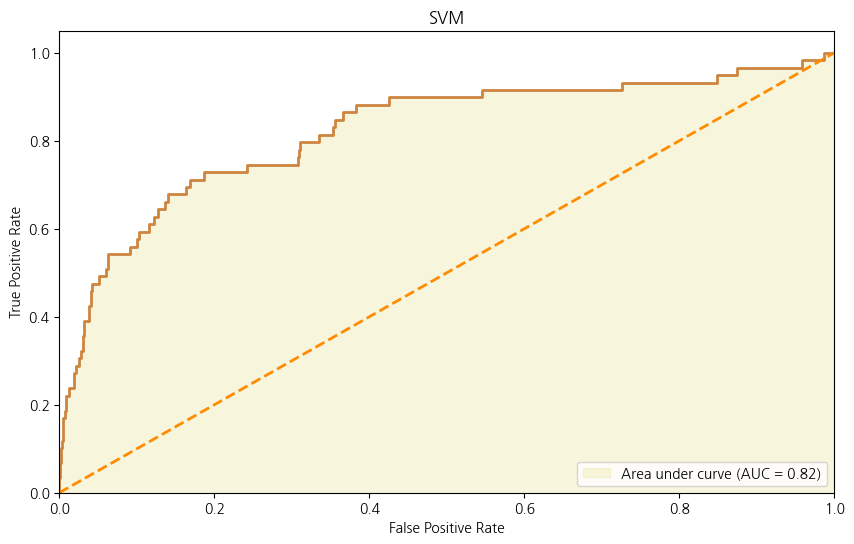

In [53]:
roc(svc, 'SVM')

In [55]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score

# TabNet 모델 초기화
tabnet = TabNetClassifier()

# 모델 학습
tabnet.fit(
        X_train=X_resampled.values,  # DataFrame을 NumPy 배열로 변환
        y_train=y_resampled.values,  # Series를 NumPy 배열로 변환
        eval_set=[(X_test.values, y_test.values)],  # 테스트 데이터도 변환
        eval_metric=['auc']
        )

# 테스트 데이터로 예측
tab_pred = tabnet.predict(X_test.values)
tab_pred_proba = tabnet.predict_proba(X_test.values)[:, 1]  # 예측도 NumPy 배열로 변환



get_clf_eval(y_test, tab_pred)
get_eval_by_threshold(y_test , tab_pred_proba.reshape(-1,1), thresholds)

Device used : cpu


epoch 0  | loss: 0.62687 | val_0_auc: 0.76737 |  0:00:01s
epoch 1  | loss: 0.39442 | val_0_auc: 0.8657  |  0:00:01s
epoch 2  | loss: 0.32968 | val_0_auc: 0.87284 |  0:00:02s
epoch 3  | loss: 0.31392 | val_0_auc: 0.88624 |  0:00:03s
epoch 4  | loss: 0.30936 | val_0_auc: 0.8921  |  0:00:03s
epoch 5  | loss: 0.29263 | val_0_auc: 0.89214 |  0:00:04s
epoch 6  | loss: 0.28997 | val_0_auc: 0.89149 |  0:00:05s
epoch 7  | loss: 0.29349 | val_0_auc: 0.89134 |  0:00:05s
epoch 8  | loss: 0.28343 | val_0_auc: 0.88312 |  0:00:06s
epoch 9  | loss: 0.27496 | val_0_auc: 0.87132 |  0:00:07s
epoch 10 | loss: 0.27745 | val_0_auc: 0.87455 |  0:00:08s
epoch 11 | loss: 0.27058 | val_0_auc: 0.856   |  0:00:08s
epoch 12 | loss: 0.26599 | val_0_auc: 0.85155 |  0:00:09s
epoch 13 | loss: 0.26416 | val_0_auc: 0.85563 |  0:00:10s
epoch 14 | loss: 0.2521  | val_0_auc: 0.86024 |  0:00:11s
epoch 15 | loss: 0.24918 | val_0_auc: 0.84993 |  0:00:11s

Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_

Best weights from best epoch are automatically used!


오차행렬
[[3357  508]
 [  15   44]]
정확도: 0.8667, 정밀도 : 0.0797, 재현율:0.7458,F1 스코어:0.1440, f2 :0.2792
ROC 스코어: 0.8072, PR 스코어 : 0.0633, G-mean : 0.8048
임곗값: 0.1
ROC_AUC: 0.8921437498629597
오차행렬
[[2391 1474]
 [   1   58]]
정확도: 0.6241, 정밀도 : 0.0379, 재현율:0.9831,F1 스코어:0.0729, f2 :0.1640
ROC 스코어: 0.8008, PR 스코어 : 0.0375, G-mean : 0.7798
---------------------------------------------------------
임곗값: 0.15
ROC_AUC: 0.8921437498629597
오차행렬
[[2583 1282]
 [   3   56]]
정확도: 0.6725, 정밀도 : 0.0419, 재현율:0.9492,F1 스코어:0.0802, f2 :0.1779
ROC 스코어: 0.8087, PR 스코어 : 0.0405, G-mean : 0.7964
---------------------------------------------------------
임곗값: 0.2
ROC_AUC: 0.8921437498629597
오차행렬
[[2729 1136]
 [   7   52]]
정확도: 0.7087, 정밀도 : 0.0438, 재현율:0.8814,F1 스코어:0.0834, f2 :0.1826
ROC 스코어: 0.7937, PR 스코어 : 0.0404, G-mean : 0.7889
---------------------------------------------------------
임곗값: 0.25
ROC_AUC: 0.8921437498629597
오차행렬
[[2845 1020]
 [   9   50]]
정확도: 0.7378, 정밀도 : 0.0467, 재현율:0.8475,F1 스코어:0.0886, f2 :0.1

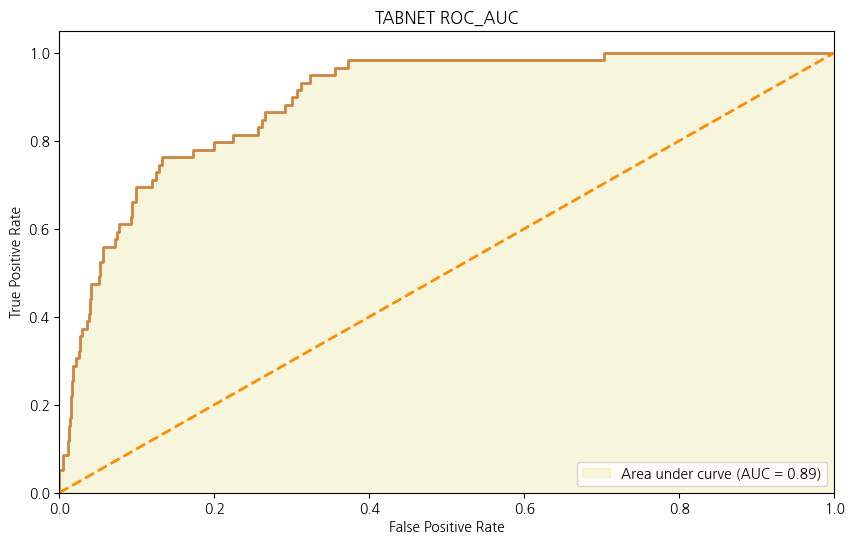

In [56]:
def tabnett(model,name,pred) :
    # 테스트 데이터에 대한 예측 확률 계산
    

    # ROC 커브 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 커브에 AUC 면적에 색을 입히는 코드 수정
    plt.figure(figsize=(10, 6))

    # ROC 커브 시각화 및 AUC 면적 색칠
    plt.fill_between(fpr, tpr, color='palegoldenrod', alpha=0.4, label=f'Area under curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='peru', lw=2)

    # 기본 설정
    plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}')
    plt.legend(loc="lower right")
    return plt.show()

tabnett(tabnet, 'TABNET ROC_AUC', tab_pred_proba)

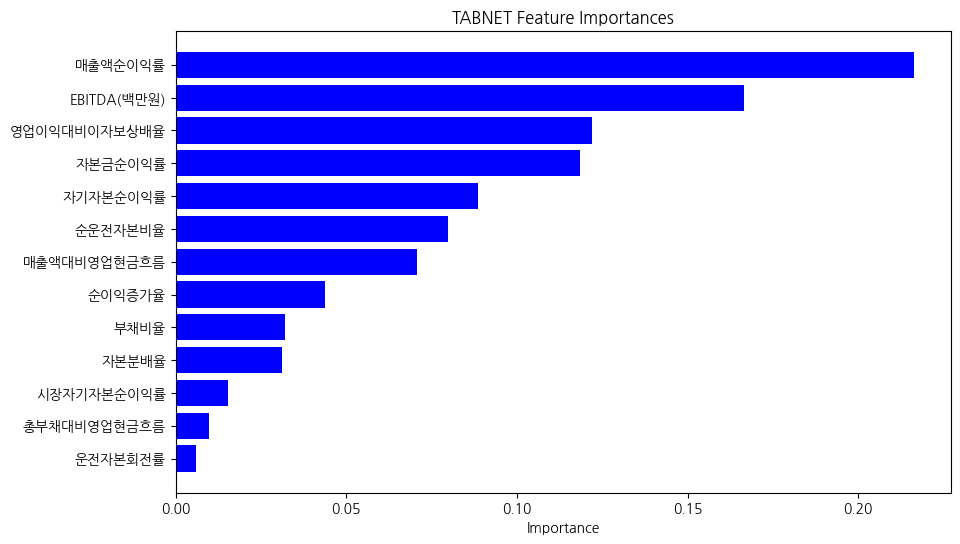

In [57]:
# 특성 중요도 추출
tabnet_feature_importances = tabnet.feature_importances_

# 특성명 가져오기 (X_resampled의 컬럼명 사용)
feature_names = X_resampled.columns

# 특성 중요도를 DataFrame으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': tabnet_feature_importances})

# 중요도에 따라 내림차순 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color = 'blue')
plt.xlabel('Importance')
plt.title('TABNET Feature Importances')
plt.gca().invert_yaxis()
plt.show()
